In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target


In [4]:
import numpy as np

class_n = max(y) + 1
one_hot = np.zeros((y.shape[0], class_n))
one_hot[np.arange(y.size), y] = 1
y = one_hot
# Because there is no alternative of sigmoid in quantum nets
# we will make targets to be a range from -1 to 1 for symmetry
y = y * 2 - 1

In [6]:
import statistics

def add_attribute_noise(data,rn):
    num_samples=data.shape[0]
    num_columns=data.shape[1]

    
    for i in range(num_samples):
        for j in range(num_columns):
            	data[i, j] += np.random.uniform(-rn*statistics.stdev(data[:,j]),rn*statistics.stdev(data[:,j]))
                

    
def add_class_noise(data,percentage):
    num_samples=data.shape[0]
    num_samples_to_select = int(percentage/100 * num_samples)
    selected_indices = np.random.choice(num_samples, num_samples_to_select, replace=False)
    
    if percentage < 100 and percentage >=0:
        for index in selected_indices:
            data[index] = np.random.choice(np.unique(iris.target),1)

def add_attribute_noise_gaussian(data,percentage):
    num_samples=data.shape[0]
    num_columns = data.shape[1]
    num_samples_to_select = int(percentage/100 * num_samples * num_columns)

    pool = [(a,b) for a in range(num_samples) for b in range(num_columns)]

    pool = np.array(pool)

    indices = pool[np.random.choice(len(pool), num_samples_to_select, replace=False)]
    
    for i,j in indices:
        data[i, j] += np.random.normal(0,statistics.stdev(data[:,j]))

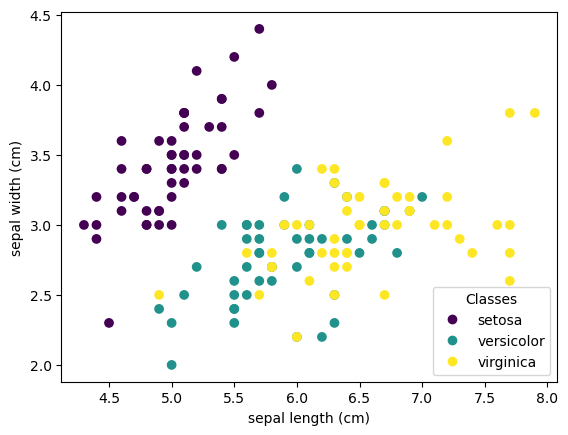

In [7]:
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

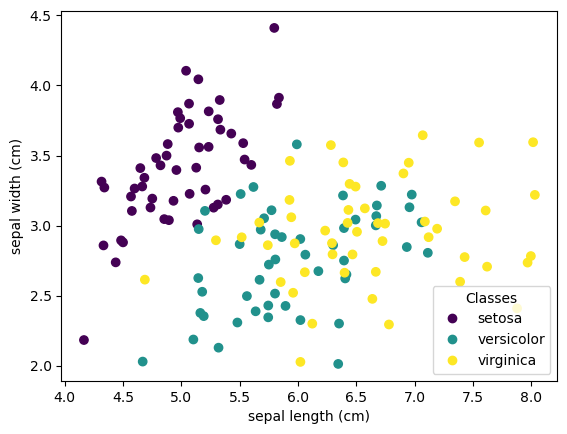

In [49]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_X = X
add_attribute_noise(attr_noisy_X,0.5)

_, ax = plt.subplots()
scatter = ax.scatter(attr_noisy_X[:, 0], attr_noisy_X[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

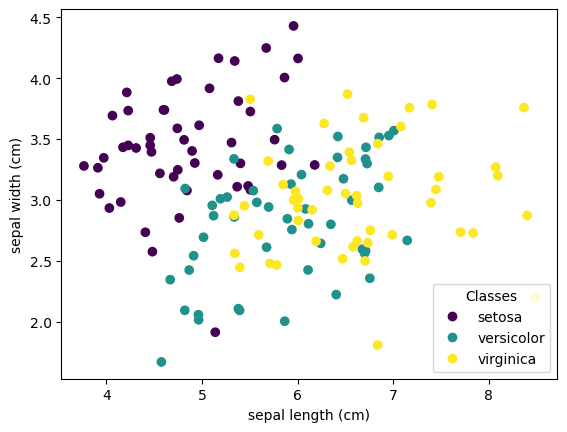

In [51]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_X = X
add_attribute_noise(attr_noisy_X,1.0)

_, ax = plt.subplots()
scatter = ax.scatter(attr_noisy_X[:, 0], attr_noisy_X[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

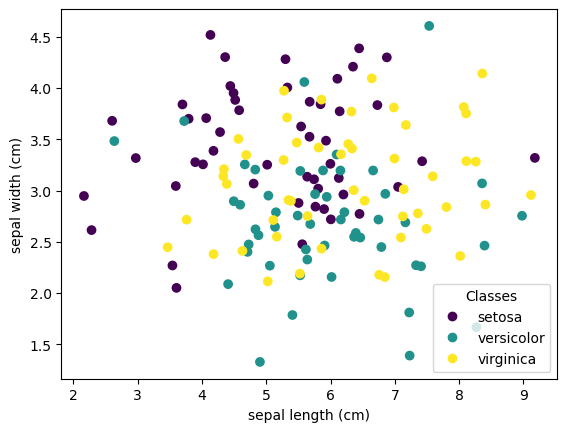

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_X = X
add_attribute_noise_gaussian(attr_noisy_X,100)

_, ax = plt.subplots()
scatter = ax.scatter(attr_noisy_X[:, 0], attr_noisy_X[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

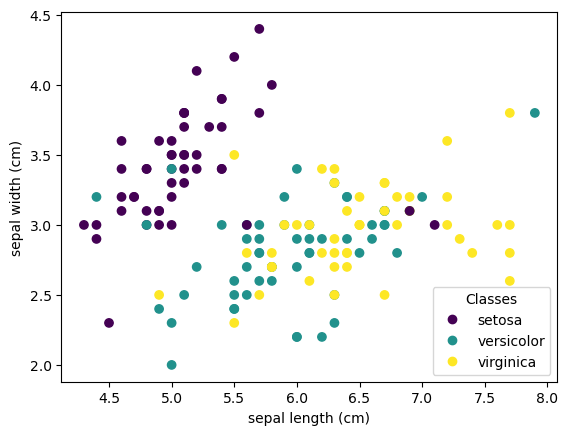

In [52]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_y = iris.target
add_class_noise(attr_noisy_y,10)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=attr_noisy_y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

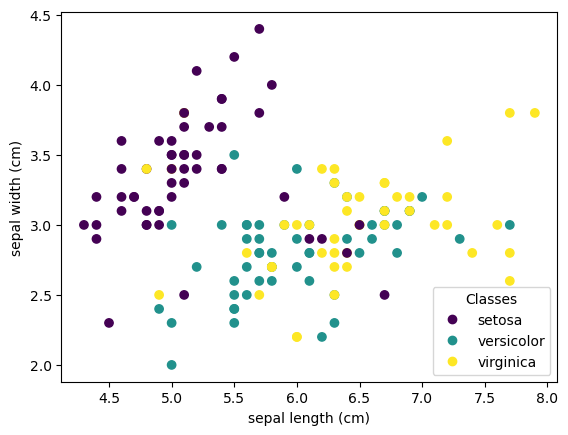

In [56]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_y = iris.target
add_class_noise(attr_noisy_y,20)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=attr_noisy_y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

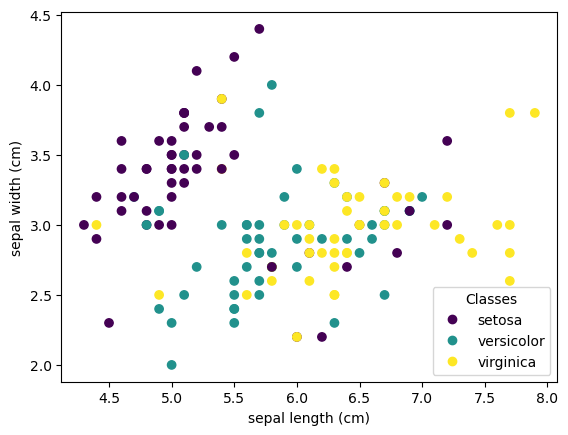

In [53]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_y = iris.target
add_class_noise(attr_noisy_y,30)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=attr_noisy_y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

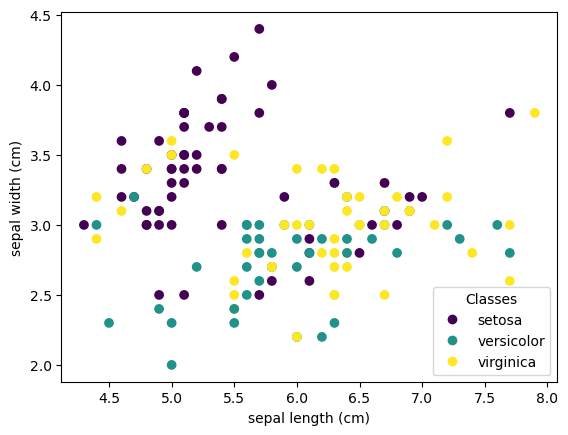

In [55]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_y = iris.target
add_class_noise(attr_noisy_y,40)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=attr_noisy_y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

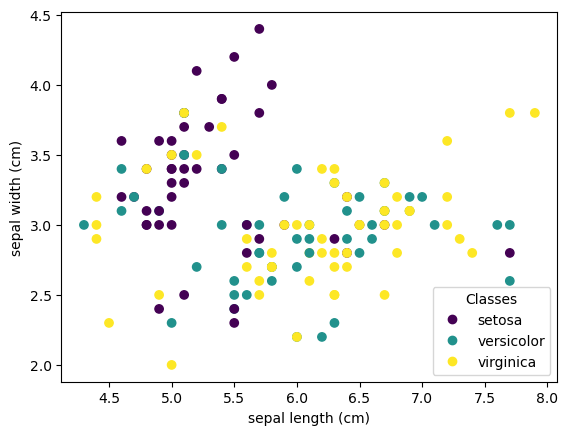

In [54]:
iris = load_iris()
X = iris.data
y = iris.target

attr_noisy_y = iris.target
add_class_noise(attr_noisy_y,50)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=attr_noisy_y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)

noises = np.linspace(0,50,50)

def animated_class_noise_plot(i):
    ax.clear()

    iris = load_iris()
    X = iris.data
    y = iris.target

    attr_noisy_y = iris.target
    add_class_noise(attr_noisy_y,noises[i])

    scatter = ax.scatter(X[:, 0], X[:, 1], c=attr_noisy_y)
    ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
    ax.set_xlim([4,8])
    ax.set_ylim([1.5, 4.5])


ani = FuncAnimation(fig, animated_class_noise_plot, frames=len(noises),
                    interval=500, repeat=False)
plt.close()

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [35]:
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
ani.save("class_animation.gif", dpi=300,
         writer=PillowWriter(fps=10))

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)

noises = np.linspace(0,3,50)

def animated_attribute_noise_plot(i):
    ax.clear()

    iris = load_iris()
    X = iris.data
    y = iris.target

    attr_noisy_X = X
    add_attribute_noise(attr_noisy_X,noises[i])

    scatter = ax.scatter(attr_noisy_X[:, 0], attr_noisy_X[:, 1], c=iris.target)
    ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
    ax.set_xlim([-2,15])
    ax.set_ylim([-2, 8])

ani = FuncAnimation(fig, animated_attribute_noise_plot, frames=len(noises),
                    interval=500, repeat=False)
plt.close()

In [32]:
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
ani.save("atrribute_animation.gif", dpi=300,
         writer=PillowWriter(fps=10))

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)

noises = np.linspace(0,100,50)

def animated_attribute_noise_plot(i):
    ax.clear()

    iris = load_iris()
    X = iris.data
    y = iris.target

    attr_noisy_X = X
    add_attribute_noise_gaussian(attr_noisy_X,noises[i])

    scatter = ax.scatter(attr_noisy_X[:, 0], attr_noisy_X[:, 1], c=iris.target)
    ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
    ax.set_xlim([1.5,11])
    ax.set_ylim([0, 6])

ani = FuncAnimation(fig, animated_attribute_noise_plot, frames=len(noises),
                    interval=500, repeat=False)
plt.close()

In [24]:
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
ani.save("atrribute_animation_gaussian.gif", dpi=300,
         writer=PillowWriter(fps=10))

In [23]:
from sklearn import svm

import numpy as np

noises = np.linspace(0,70,8)
iris = load_iris()
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
y_trains = []

for i in noises:
    add_class_noise(y_train,i)
    y_trains.append(y_train)
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)


for y_iter in y_trains:
    svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
    svm_clf.fit(x_train,y_iter)
    predicted = svm_clf.predict(x_test)
    score = svm_clf.score(x_test, y_test)
    svm_score_ = np.mean(score)

    print('Accuracy : %.3f' % (svm_score_))

Accuracy : 1.000
Accuracy : 1.000
Accuracy : 1.000
Accuracy : 1.000
Accuracy : 1.000
Accuracy : 0.947
Accuracy : 0.763
Accuracy : 0.868


In [21]:
from sklearn import svm

import numpy as np

noises = np.linspace(0,3,7)
iris = load_iris()
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
x_trains = []

for i in noises:
    add_attribute_noise(x_train,i)
    x_trains.append(x_train)
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)


for x_iter in x_trains:
    svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
    svm_clf.fit(x_iter,y_train)
    predicted = svm_clf.predict(x_test)
    score = svm_clf.score(x_test, y_test)
    svm_score_ = np.mean(score)

    print('Accuracy : %.3f' % (svm_score_))

Accuracy : 1.000
Accuracy : 1.000
Accuracy : 1.000
Accuracy : 0.895
Accuracy : 0.947
Accuracy : 0.684
Accuracy : 0.447


In [22]:
from sklearn import svm

import numpy as np

noises = np.linspace(0,100,11)
iris = load_iris()
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
x_trains = []

for i in noises:
    add_attribute_noise_gaussian(x_train,i)
    x_trains.append(x_train)
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)


for x_iter in x_trains:
    svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
    svm_clf.fit(x_iter,y_train)
    predicted = svm_clf.predict(x_test)
    score = svm_clf.score(x_test, y_test)
    svm_score_ = np.mean(score)

    print('Accuracy : %.3f' % (svm_score_))

Accuracy : 1.000
Accuracy : 1.000
Accuracy : 1.000
Accuracy : 0.974
Accuracy : 1.000
Accuracy : 0.895
Accuracy : 1.000
Accuracy : 0.895
Accuracy : 0.842
Accuracy : 0.895
Accuracy : 0.921
